In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch.nn import Linear as Linear

# ДЗ 3.1, 3.2,

## 3.1 Автоматическое дифференцирование в `torch`

Автоматическое дифференцирование (automatic differentiation) - это способ вычисления градиентов функции по ее входным параметрам с использованием цепного правила дифференцирования. В глубоком обучении автоматическое дифференцирование используется для вычисления градиентов функции потерь по параметрам модели, чтобы оптимизировать ее на основе данных обучения.

torch предоставляет автоматическое дифференцирование с помощью пакета autograd. Когда мы вызываем метод backward() на тензоре, содержащем результат операции вычисления функции потерь, PyTorch использует автоматическое дифференцирование для вычисления градиентов этого тензора по всем параметрам модели.

PyTorch представляет граф вычислений (computational graph), в котором каждая операция представлена узлом графа, а каждый тензор представлен ребром графа. Граф вычислений хранит историю всех операций, выполняемых с тензорами, включая операции вычисления функции потерь и операции на каждом слое модели. Когда мы вызываем метод backward(), PyTorch автоматически применяет цепное правило дифференцирования для вычисления градиентов функции потерь по всем параметрам модели на основе этого графа вычислений.

Таким образом, автоматическое дифференцирование в torch облегчает процесс обучения моделей глубокого обучения, так как мы можем использовать стандартные оптимизаторы, такие как стохастический градиентный спуск, для обновления параметров модели на основе вычисленных градиентов, без необходимости явно вычислять градиенты вручную.

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [2]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [3]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.y_pred = torch.tensor(y_pred, requires_grad=True)
    self.z = (self.y_pred - y_true) ** 2
    return self.z

  def backward(self):
    self.z.backward()
    self.dinput =  self.y_pred.grad

In [4]:
class Neuron:
  def __init__(self, n_inputs):
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)
  
  def forward(self, input):
    self.input = input
    return torch.dot(self.weights, input) + self.bias # скалярное произведение
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss) - по сути производная ошибки dE
    self.dweights = dvalue * self.input # df/dW
    self.dinput =  dvalue * self.weights # df/wX
    self.dbias = dvalue # df/db

In [5]:
import random

n_inputs = 4 # <размерность элемента выборки >
lr = 0.01 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(100):
  for x_example, y_example in random.sample(list(zip(X, y)), 20):
    # forward pass
    y_pred = neuron.forward(x_example) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    loss.backward()
    neuron.backward(loss.dinput)
    # градиентный спуск
    neuron.weights -= lr * neuron.dweights
    neuron.bias -= lr * neuron.dbias
  print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу

    # <шаг оптимизации для весов (weights и bias) нейрона>

C:\Users\zonkz\AppData\Local\Temp\ipykernel_9088\1367873144.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)


epoch 0 mean loss tensor([14294.7705], grad_fn=<DivBackward0>)
epoch 1 mean loss tensor([9080.3584], grad_fn=<DivBackward0>)
epoch 2 mean loss tensor([6659.1006], grad_fn=<DivBackward0>)
epoch 3 mean loss tensor([5151.7388], grad_fn=<DivBackward0>)
epoch 4 mean loss tensor([4247.3042], grad_fn=<DivBackward0>)
epoch 5 mean loss tensor([3585.7405], grad_fn=<DivBackward0>)
epoch 6 mean loss tensor([3086.1936], grad_fn=<DivBackward0>)
epoch 7 mean loss tensor([2707.8054], grad_fn=<DivBackward0>)
epoch 8 mean loss tensor([2410.9185], grad_fn=<DivBackward0>)
epoch 9 mean loss tensor([2170.6631], grad_fn=<DivBackward0>)
epoch 10 mean loss tensor([1973.6649], grad_fn=<DivBackward0>)
epoch 11 mean loss tensor([1809.2760], grad_fn=<DivBackward0>)
epoch 12 mean loss tensor([1670.1482], grad_fn=<DivBackward0>)
epoch 13 mean loss tensor([1550.8748], grad_fn=<DivBackward0>)
epoch 14 mean loss tensor([1447.4923], grad_fn=<DivBackward0>)
epoch 15 mean loss tensor([1357.0317], grad_fn=<DivBackward0>)
e

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [69]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.normal(0, 1, (n_features, n_neurons), requires_grad=True)
    self.biases = torch.zeros(1, n_neurons, requires_grad=True)
  
  def forward(self, inputs):
    res = torch.matmul(inputs, self.weights) + self.biases
    #res = inputs @ self.weights + self.biases # <реализовать логику слоя>
    return res
  
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true)**2) # <реализовать логику MSE>

class ReLU:
  def forward(self, inputs):
    return inputs.clip(min=0)




tensor([[0.0000],
        [0.0094],
        [0.0188],
        [0.0282],
        [0.0376],
        [0.0470],
        [0.0564],
        [0.0657],
        [0.0751],
        [0.0845],
        [0.0939],
        [0.1033],
        [0.1127],
        [0.1221],
        [0.1315],
        [0.1409],
        [0.1503],
        [0.1597],
        [0.1691],
        [0.1785],
        [0.1878],
        [0.1972],
        [0.2066],
        [0.2160],
        [0.2254],
        [0.2348],
        [0.2442],
        [0.2536],
        [0.2630],
        [0.2724],
        [0.2818],
        [0.2912],
        [0.3006],
        [0.3099],
        [0.3193],
        [0.3287],
        [0.3381],
        [0.3475],
        [0.3569],
        [0.3663],
        [0.3757],
        [0.3851],
        [0.3945],
        [0.4039],
        [0.4133],
        [0.4227],
        [0.4320],
        [0.4414],
        [0.4508],
        [0.4602],
        [0.4696],
        [0.4790],
        [0.4884],
        [0.4978],
        [0.5072],
        [0

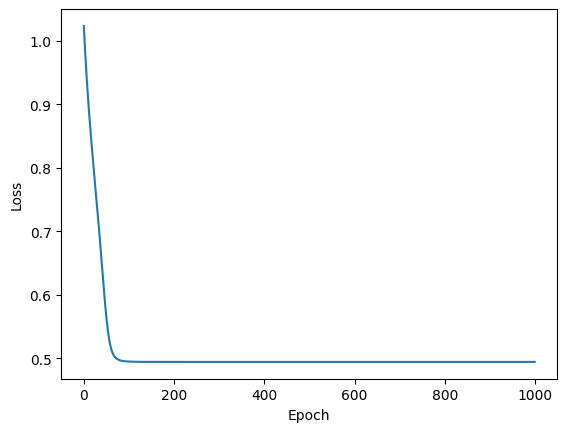

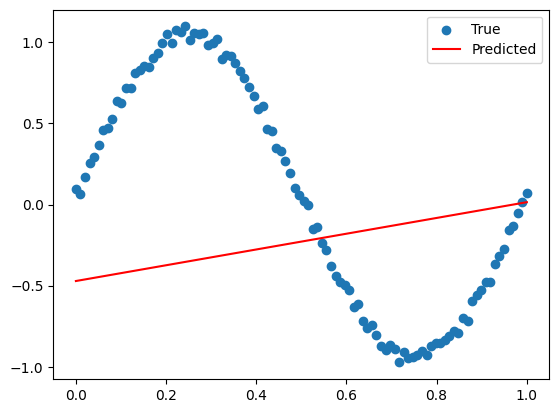

In [68]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())


learning_rate = 0.01
batch_size = 10
epochs = 1000

model = Linear(1, 1)
loss_fn = MSELoss()
activation_fn = ReLU()

losses = []
for epoch in range(epochs):
  # for i in range(0, len(X), batch_size):
  #   X_batch = X[i:i+batch_size].view(-1, 1)
  #   y_batch = y[i:i+batch_size].view(-1, 1)

  # Прямой проход
  y_pred = activation_fn.forward(model.forward(X))
  print(y_pred)

  # Вычисление функции потерь
  loss = loss_fn.forward(y_pred, y)
  losses.append(loss.item())

  # Обратный проход и обновление весов (автоматическое диффереренцирование autograd)
  loss.backward()
  # model.weights.backward()
  # model.biases.backward()
  # Используем конструкцию with torch.no_grad() чтобы временно выключить требования градиентов в процессе обратного распространения ошибки
  # в целях оптимизации весов, если не использовать, то градиенты будут сохранены и могут повлиять на результаты оптимизации в следующей итерации обучения
  with torch.no_grad():
      model.weights -= learning_rate * model.weights.grad
      model.biases -= learning_rate * model.biases.grad
  # zero_() - inplace (меняет тензор градиента напрямую), zero() - out-of-place (возвращает новый обнуленный тензор, исхорный остается без изменений)
  model.weights.grad.zero_() 
  model.biases.grad.zero_()

# График функции потерь
print(losses)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# График исходных данных и предсказанных значений
# with torch.no_grad():
y_pred = model.forward(X).detach().numpy()
  # print(y_pred)
plt.scatter(X, y, label="True")
plt.plot(X, y_pred, label="Predicted", color="red")
plt.legend()
plt.show()

<bound method Module.parameters of RegressionModel(
  (linear): Linear(in_features=1, out_features=1000, bias=True)
  (linear2): Linear(in_features=1000, out_features=1, bias=True)
)>


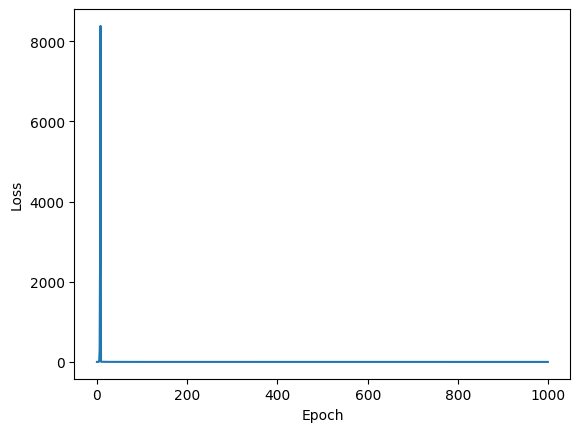

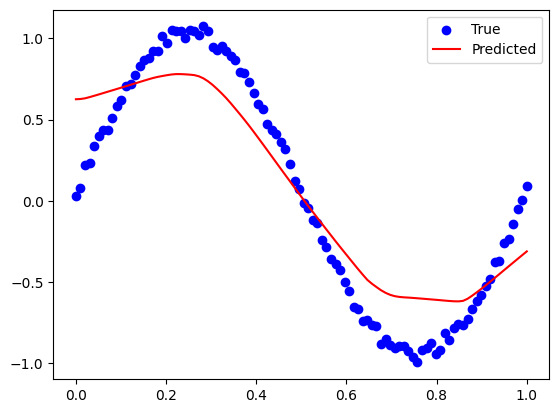

In [11]:
import torch
import matplotlib.pyplot as plt

# Создаем исходные данные
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

# Создаем модель
class RegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_size, hidden_size)
        self.relu = ReLU()
        self.linear2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu.forward(x)
        x = self.linear2(x)
        return x

# Инициализируем модель и функцию потерь
model = RegressionModel(1, 1000, 1)
print(model.parameters)
loss_fn = MSELoss()

# Инициализируем оптимизатор
learning_rate = 0.01

# # Параметры
# weight_1 = torch.nn.Parameter(torch.randn(1, 10))
# bias_1 = torch.nn.Parameter(torch.zeros(10))

# weight_2 = torch.nn.Parameter(torch.randn(10, 1))
# bias_2 = torch.nn.Parameter(torch.zeros(1))


optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Обучение модели
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Сброс градиентов перед обратным распространением
    optimizer.zero_grad()

    # Вычисление предсказания модели и значения функции потерь
    y_pred = model(X)
    loss = loss_fn.forward(y_pred, y)

    # Расчет градиентов и обновление весов
    loss.backward()
    optimizer.step()

    # Сохранение значения функции потерь
    losses.append(loss.item())

# Вывод результатов
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Вывод исходных данных и предсказанных значений на одном графике
plt.scatter(X, y, color='blue', label="True")
plt.plot(X, model(X).detach().numpy(), color='red', label="Predicted")
plt.legend()
plt.show()

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [39]:
import torch.optim as optim

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [40]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

class SquaredLoss:
  def forward(self, y_pred, y_true):
    self.y_pred = torch.tensor(y_pred, requires_grad=True)
    self.z = (self.y_pred - y_true) ** 2
    return self.z

  def backward(self):
    self.z.backward()
    self.dinput =  self.y_pred.grad
    
class Neuron:
  def __init__(self, n_inputs):
    self.n_inputs = n_inputs
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)
  
  def forward(self, input):
    self.input = input
    return torch.dot(self.weights, input) + self.bias # скалярное произведение
  
  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss) - по сути производная ошибки dE
    self.dweights = dvalue * self.input # df/dW
    self.dinput =  dvalue * self.weights # df/wX
    self.dbias = dvalue # df/db
  
import random

n_inputs = 4 # <размерность элемента выборки >
lr = 0.01 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

# оптимизатор
optimizer = optim.SGD(params=[neuron.weights, neuron.bias], lr=lr)

losses = []
# автоматическое обновление весов
for epoch in range(n_epoch):
  for x_example, y_example in random.sample(list(zip(X, y)), 20):
    optimizer.zero_grad() # обнуляем градиенты перед вычислением новых
    # forward pass
    y_pred = neuron.forward(x_example) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
    

    # backprop
    loss.backward()
    neuron.backward(loss.dinput)
    
    # градиентный спуск
    with torch.no_grad():
      neuron.weights -= lr * neuron.dweights
      neuron.bias -= lr * neuron.dbias
    optimizer.step()
    
    losses.append(curr_loss)
    
  print(f'epoch {epoch} mean loss {sum(losses) / len(losses)}')


/tmp/ipykernel_1888/2380622121.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)


epoch 0 mean loss tensor([1655.6254], grad_fn=<DivBackward0>)
epoch 1 mean loss tensor([1162.4888], grad_fn=<DivBackward0>)
epoch 2 mean loss tensor([905.0262], grad_fn=<DivBackward0>)
epoch 3 mean loss tensor([740.9498], grad_fn=<DivBackward0>)
epoch 4 mean loss tensor([607.7219], grad_fn=<DivBackward0>)
epoch 5 mean loss tensor([518.8704], grad_fn=<DivBackward0>)
epoch 6 mean loss tensor([447.7513], grad_fn=<DivBackward0>)
epoch 7 mean loss tensor([392.2165], grad_fn=<DivBackward0>)
epoch 8 mean loss tensor([348.9333], grad_fn=<DivBackward0>)
epoch 9 mean loss tensor([314.4138], grad_fn=<DivBackward0>)
epoch 10 mean loss tensor([285.9450], grad_fn=<DivBackward0>)
epoch 11 mean loss tensor([262.1609], grad_fn=<DivBackward0>)
epoch 12 mean loss tensor([242.0184], grad_fn=<DivBackward0>)
epoch 13 mean loss tensor([224.7413], grad_fn=<DivBackward0>)
epoch 14 mean loss tensor([209.7621], grad_fn=<DivBackward0>)
epoch 15 mean loss tensor([196.6531], grad_fn=<DivBackward0>)
epoch 16 mean lo

3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

100


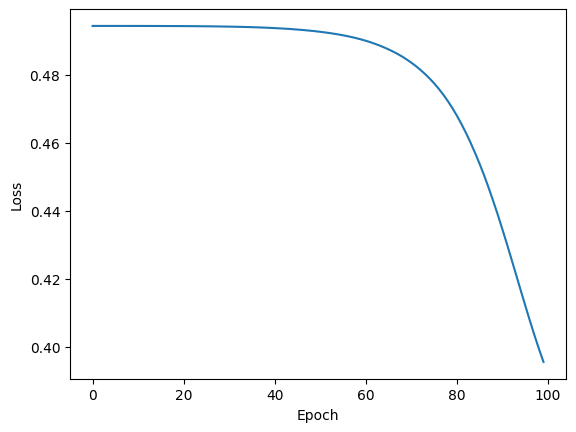

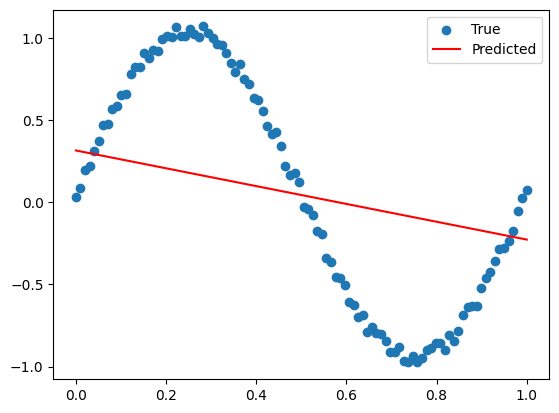

In [64]:
import matplotlib.pyplot as plt

X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.normal(0, 1, (n_features, n_neurons), requires_grad=True)
    self.biases = torch.zeros(1, n_neurons, requires_grad=True)
  
  def forward(self, inputs):
    res = inputs @ self.weights + self.biases # <реализовать логику слоя>
    return res
  
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true)**2) # <реализовать логику MSE>

class ReLU:
  def forward(self, inputs):
    return inputs.clip(min=0)

learning_rate = 0.001
batch_size = 10
epochs = 100

model = Linear(1, 1)
loss_fn = MSELoss()
activation_fn = ReLU()

optimizer = torch.optim.Adam(params=[model.weights, model.biases], lr=learning_rate)

losses = []
# автоматическое обновление весов с optim.Adam
for epoch in range(epochs):
  # for i in range(0, len(X), batch_size):
  #   X_batch = X[i:i+batch_size]
  #   y_batch = y[i:i+batch_size]

  # Прямой проход
  y_pred = activation_fn.forward(model.forward(X))

  # Вычисление функции потерь
  loss = loss_fn.forward(y_pred, y)
  losses.append(loss.item())

  # Обратный проход и обновление весов
  optimizer.zero_grad()
  loss.backward()
  with torch.no_grad():
    model.weights -= lr * model.weights.grad
    model.biases -= lr * model.biases.grad
  optimizer.step()

# График функции потерь
print(len(losses))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# График исходных данных и предсказанных значений
with torch.no_grad():
  y_pred = model.forward(X)
plt.scatter(X, y, label="True")
plt.plot(X, y_pred, label="Predicted", color="red")
plt.legend()
plt.show()

<bound method Module.parameters of RegressionModel(
  (linear): Linear(in_features=1, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)>
[0.5992184281349182, 0.5051727294921875, 0.48607632517814636, 0.4392470121383667, 0.38365989923477173, 0.34302765130996704, 0.3184117376804352, 0.29599636793136597, 0.26850035786628723, 0.24173849821090698, 0.22406651079654694, 0.21623221039772034, 0.21148842573165894, 0.20529773831367493, 0.20032697916030884, 0.20083218812942505, 0.2054508626461029, 0.20853033661842346, 0.20777618885040283, 0.2059306651353836, 0.20543254911899567, 0.20496182143688202, 0.2020511031150818, 0.19698745012283325, 0.19223079085350037, 0.1890867054462433, 0.18651409447193146, 0.18322530388832092, 0.17969942092895508, 0.17733435332775116, 0.1763935685157776, 0.1756853461265564, 0.17441724240779877, 0.1730528622865677, 0.17222070693969727, 0.1716192215681076, 0.1705412119626999, 0.1689578890800476, 0.16751901805400848, 0.1664714664

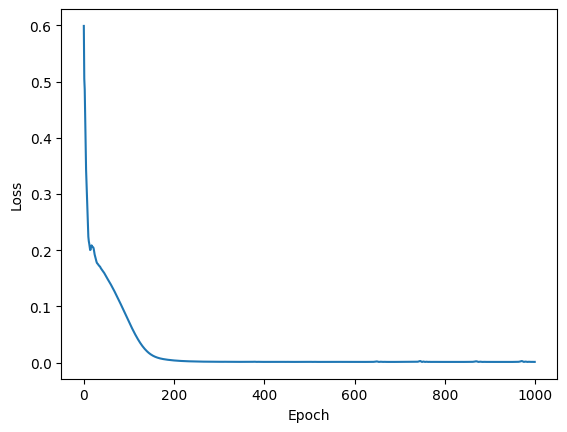

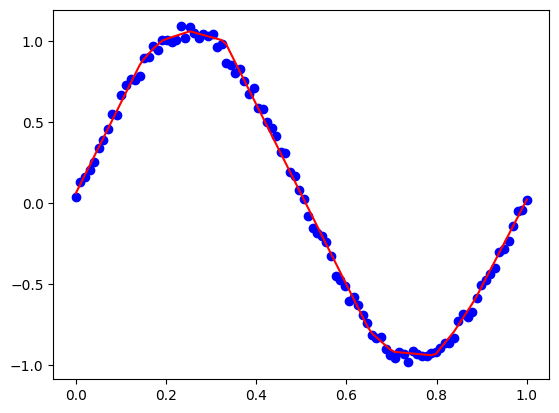

In [14]:
import torch
import matplotlib.pyplot as plt

# Создаем исходные данные
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

# Создаем модель
class RegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_size, hidden_size) # скрытый слой с 100 нейронами
        self.relu = ReLU()
        self.linear2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu.forward(x)
        x = self.linear2(x)
        return x

# Инициализируем модель и функцию потерь
model = RegressionModel(1, 100, 1)
print(model.parameters)
loss_fn = MSELoss()

# Инициализируем оптимизатор
learning_rate = 0.01

# # Параметры
# weight_1 = torch.nn.Parameter(torch.randn(1, 10))
# bias_1 = torch.nn.Parameter(torch.zeros(10))

# weight_2 = torch.nn.Parameter(torch.randn(10, 1))
# bias_2 = torch.nn.Parameter(torch.zeros(1))


optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Обучение модели
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Сброс градиентов перед обратным распространением
    optimizer.zero_grad()

    # Вычисление предсказания модели и значения функции потерь
    y_pred = model(X)
    loss = loss_fn.forward(y_pred, y)

    # Расчет градиентов и обновление весов
    loss.backward()
    optimizer.step()

    # Сохранение значения функции потерь
    losses.append(loss.item())

# Вывод результатов
print(losses)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Вывод исходных данных и предсказанных значений на одном графике
plt.scatter(X, y, color='blue')
# print(f"detach: {model(X).detach().numpy()}")
plt.plot(X, model(X).detach().numpy(), color='red')
plt.show()

## 3.3 Построение сетей при помощи `torch.nn`

In [5]:
import torch.nn as nn

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [8]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.4 * torch.rand(X.size()) 

In [15]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons_1, n_hidden_neurons_2):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons_1)
        # поэкспериментировать с другиями функциями активации
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons_2, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

sine_net = SineNet(10, 10)

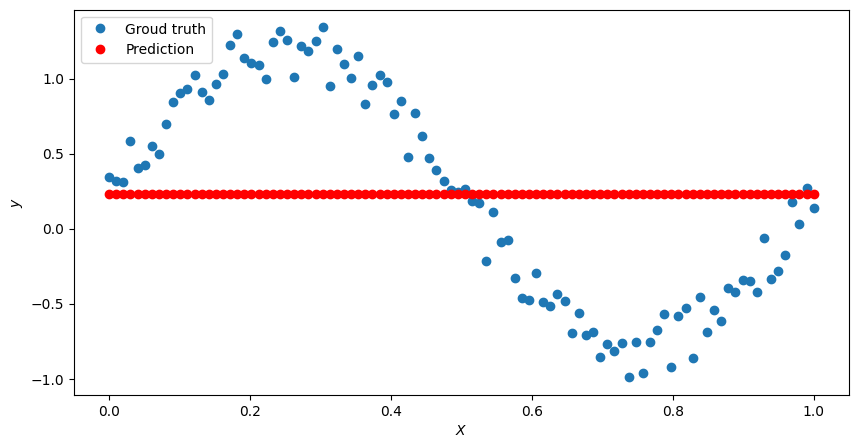

In [16]:
import matplotlib.pyplot as plt

def predict(net, X, y):
    y_pred = net.forward(X)

    plt.figure(figsize=(10, 5))
    plt.plot(X.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(X.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$X$')
    plt.ylabel('$y$')

predict(sine_net, X, y)

In [17]:
optimizer = torch.optim.Adam(params=sine_net.parameters(), lr=0.01)
criterion = torch.nn.MSELoss(reduction="sum")

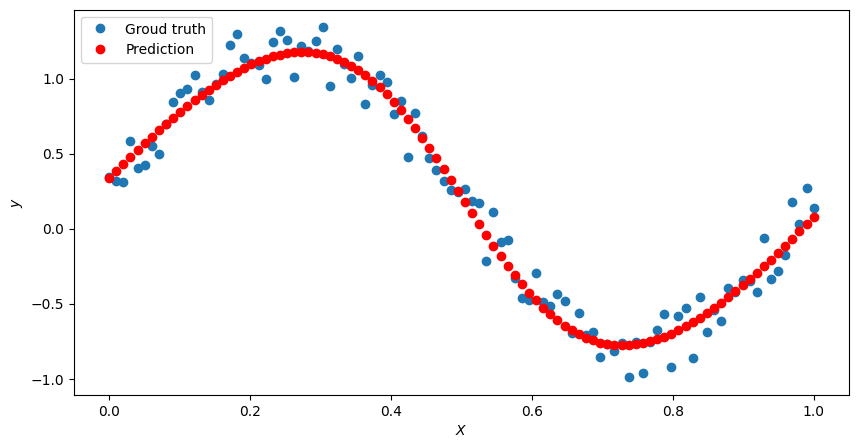

In [18]:
for epoch in range(1000):
    optimizer.zero_grad()

    y_pred =  sine_net.forward(X)
    loss_val = criterion.forward(y_pred, y)

    loss_val.backward()

    optimizer.step()

predict(sine_net, X, y)

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

## 3.4. Datasets and dataloaders

In [ ]:
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [ ]:
class SinDataset(Dataset):
  def __init__(self):
    pass

  def __len__(self):
    pass

  def __getitem__(self, idx):
    pass

3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


In [ ]:
class DiamondsDataset(Dataset):
  def __init__(self, data):
    pass

  def __len__(self):
    pass

  def __getitem__(self, idx):
    pass

3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [ ]:
class DiamondsDataset(Dataset):
  def __init__(self, data, transform):
    # ....
    self.transform = transform
    # ....

  def __len__(self):
    pass

  def __getitem__(self, idx):
    # ...
    sample = self.X[idx], self.y[idx]
    if self.transform:
      sample = self.transform(sample)
    # ....

In [ ]:
class DropColsTransform:
  def __init__(self, drop):
    pass
  
  def __call__(self, sample):
    X, y = sample
    # <удаление из X столбцов self.drop>
    return X, y

In [ ]:
class ToTensorTransform:
  def __call__(self, sample):
    X, y = sample
    # <преобразование X и y в тензоры>
    return X, y

In [ ]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset(data, transforms.compose([drop, to_tensor]))
